# Исследование объявлений о продаже квартир

В распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Необходимо научиться определять рыночную стоимость объектов недвижимости. Это позволит в дальнейшем построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

**Этапы**

*1 Найти, изучить и устранить пропущенные значения в столбцах где это возможно. Преобразовать типы данных в столбцах. Изучить уникальные значения в столбце с названиями и устранить неявные дубликаты.*

*2 Добавить в таблицу новые столбцы со следующими параметрами:*
* цена одного квадратного метра;
* день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
* месяц публикации объявления;
* год публикации объявления;
* тип этажа квартиры (значения — «‎первый», «последний», «другой»);
* расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

*3 Провести исследовательский анализ следующих данных:*
* общая площадь;
* жилая площадь;
* площадь кухни;
* цена объекта;
* количество комнат;
* высота потолков;
* этаж квартиры;
* тип этажа квартиры («первый», «последний», «другой»);
* общее количество этажей в доме;
* расстояние до центра города в метрах;
* расстояние до ближайшего аэропорта;
* расстояние до ближайшего парка;
* день и месяц публикации объявления.

*Построить отдельные гистограммы для каждого из этих параметров.* 
* Изучить, как быстро продавались квартиры. Построить гистограмму. Посчитайть среднее и медиану. 
* Определить какие продажи можно считать быстрыми, а какие — необычно долгими.
* Изучить какие факторы больше всего влияют на общую (полную) стоимость объекта?

*Изучить, зависит ли цена от:*
* общей площади;
* жилой площади;
* площади кухни;
* количества комнат;
* этажа, на котором расположена квартира (первый, последний, другой);
* даты размещения (день недели, месяц, год).
* Построить графики, которые покажут зависимость цены от указанных выше параметров.

*Посчитайть среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра. 

*Вычислить среднюю цену каждого километра Питера. Описать, как стоимость объектов зависит от расстояния до центра города.


### Общая информация. 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


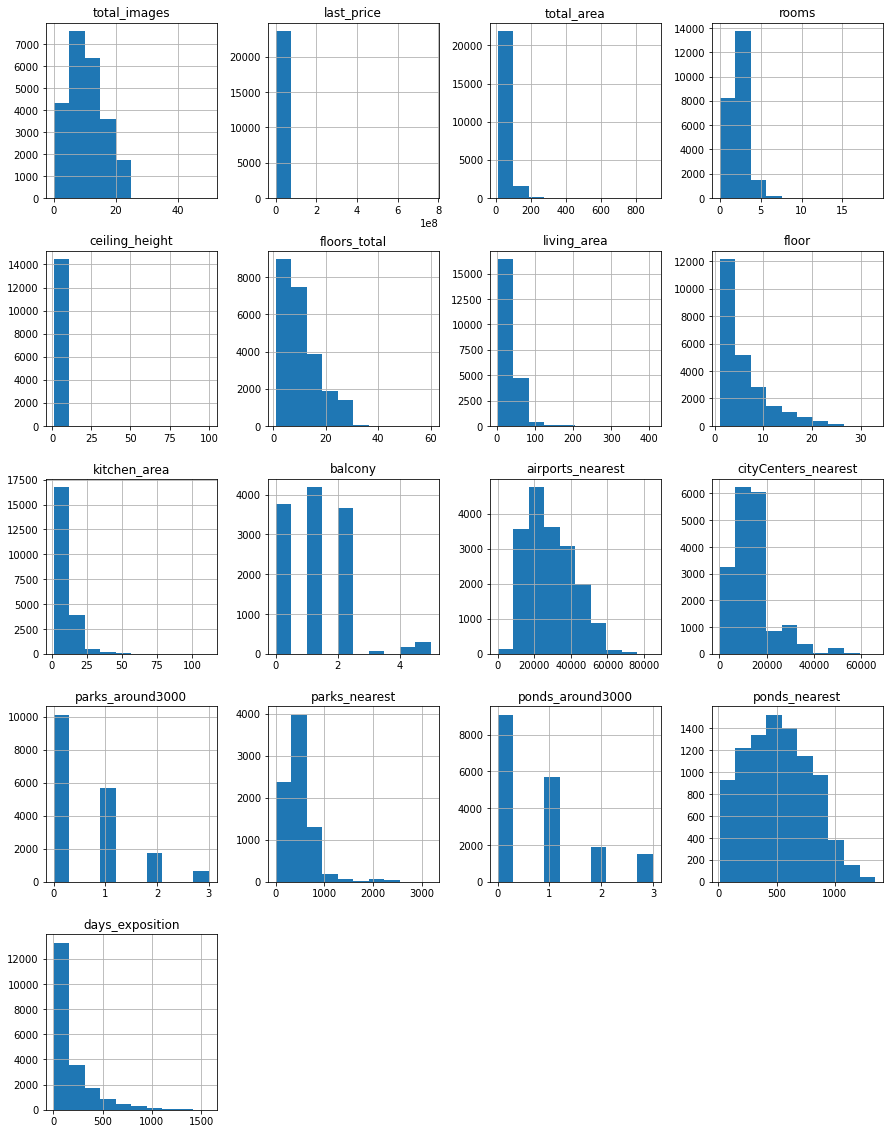

In [4]:
df.hist(figsize=(15,20));

### Предобработка данных

#### Первичная замена пропусков

In [5]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(19,6), legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

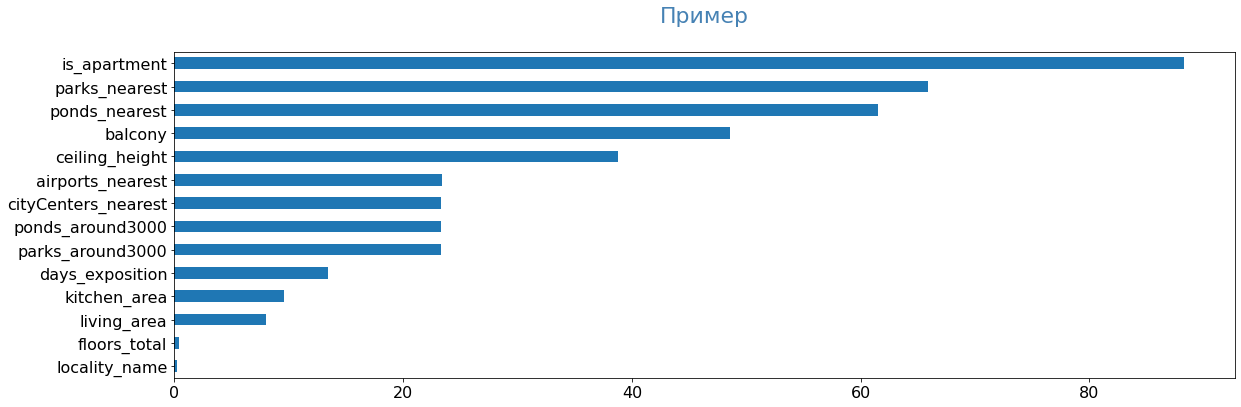

In [7]:
pass_value_barh(df)

In [8]:
df['balcony'].fillna(0, inplace=True)
df['locality_name'].fillna('unknown', inplace=True)
df.dropna(subset=['floors_total'], inplace=True)
df['is_apartment'].fillna('False', inplace=True)

Заполняем пропуски в числах балконов нулями. Скорее всего там где не указано количество балконов их попросту нет.
Количество пропусков в числе этажей мало, можно отсеять эти значения без особого вреда
Скорее всего если люди не указывают тип площади, то это не апартаменты, заменим пропуски False.

In [9]:
df.query('parks_around3000.isna()').compare(df.query('ponds_around3000.isna()'))

Empty DataFrame
Columns: []
Index: []

In [10]:
df['parks_around3000'].fillna(0, inplace=True)
df['ponds_around3000'].fillna(0, inplace=True)

Те, кто не заполнил один столбец, не заполнили и второй, ввиду того, что эти столбцы обрабатывает машина, возможно, это баг. Тем не менее, будем считать, что там где не указано их количество их попросту нет рядом. Заполняем пропуски в числах прудов и парков поблизости нулями.

##### Анализ пропусков `cityCenters_nearest`

In [11]:
df.query('cityCenters_nearest.isna()')['locality_name'].value_counts()

посёлок Мурино                        520
Всеволожск                            398
Гатчина                               307
деревня Кудрово                       299
Выборг                                237
                                     ... 
деревня Большой Сабск                   1
коттеджный поселок Кивеннапа Север      1
деревня Большое Рейзино                 1
деревня Пикколово                       1
деревня Старое Хинколово                1
Name: locality_name, Length: 346, dtype: int64

In [12]:
(
    df.query('locality_name.isin(["посёлок Мурино", "Всеволожск", "Гатчина", "деревня Кудрово", "Выборг"])')
    ['locality_name'].value_counts()
)

посёлок Мурино     520
Всеволожск         398
Гатчина            307
деревня Кудрово    299
Выборг             237
Name: locality_name, dtype: int64

In [13]:
len(df.query('cityCenters_nearest.isna()')['locality_name'].unique())

346

In [14]:
len(df.query('locality_name.isin(@df.query("cityCenters_nearest.isna()")["locality_name"])')['locality_name'].unique())

346

Как видно, все помещения в этих городах не имеют расстояния до центра. Пропуски в столбце `cityCenters_nearest` скорее всего вызваны тем, что в этих городах нет метки центра.

##### Вывод  

Пропуски в столбцах `ceiling_height`, `living_area`, `kitchen_area`, `is_apartment`, `balcony`, скорее всего, вызваны тем, что в форме можно не вбивать эти ячейки. Многие пренебрегают заполнением значения `is_apartment`. Также, некоторые смогли вбить в форму жилье без города (столбец `locality_name`). Во всех этих случаях стоит ввести в форму выбор среди нескольких результатов или обязательное заполнение поля

Пропуски в столбце `cityCenters_nearest`, скорее всего вызваны отсутствием метки центра города. В `airports_nearest`, `parks_nearest`, `ponds_nearest`, вызваны банальным отсутствием этих объектов в городе, стоит проверить это отдельно. В `days_exposition` скорее всего из-за отсутствие продажи на момент запроса датасета

Пропуски в столбцах `parks_around3000`, `ponds_around3000` скорее всего вызваны багом, в ячейках наблюдается полное биективное отсутствие данных.

#### Изменение типов ячеек `first_day_exposition`, `balcony`, `parks_around3000`, `ponds_around3000`, `'is_apartment'`

In [15]:
df['first_day_exposition'].head()

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object

In [16]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')
df['balcony'] = df['balcony'].astype('int')
df['parks_around3000'] = df['parks_around3000'].astype('int')
df['ponds_around3000'] = df['ponds_around3000'].astype('int')
df['is_apartment'] = df['is_apartment'].astype('bool')
df['floors_total'] = df['floors_total'].astype('int')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  float64       
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        14495 non-null  float64       
 6   floors_total          23613 non-null  int64         
 7   living_area           21743 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          21382 non-null  float64       
 13  balcony         

Тип данных в столбце `first_day_exposition` измененен на `daytime` для последующих операций со временем.
Тип данных в столбце ``is_apartment`` измененен на `bool` для возможных последующих фильтраций по этому критерию.

Тип данных в столбцах  `balcony`, `parks_around3000`, `ponds_around3000` изменен на `int`, это более эстетическая замена, т.к. числа здесь небольшие и искажения при операциях с ними будут все равно незначительные. Для столбцов `floors_total`, `days_exposition` такие эстетические смены невозможны ввиду наличия значений `nan`

#### Удаление дубликатов в столбце `locality_name`

In [18]:
df['locality_name'].sort_values().unique()

array(['unknown', 'Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск',
       'Выборг', 'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород',
       'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино',
       'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово',
       'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино',
       'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф',
       'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк',
       'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно',
       'Шлиссельбург', 'городской поселок Большая Ижора',
       'городской поселок Янино-1', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
       'город

In [19]:
len(df['locality_name'].unique())

365

In [20]:
len(df['locality_name']
    .str.lower()
    .str.replace('ё', 'е')
    .unique()
)

331

In [21]:
locality_name_to_replace = [
    'деревня ', 'коттеджный поселок ', 'городской поселок ',
    'поселок городского типа ', 'поселок при железнодорожной станции ',
    'поселок станции ', 'садоводческое некоммерческое товарищество ',
    'садовое товарищество ', 'село ', 'поселок '
]


df['locality_name'] = (
    df['locality_name']
    .str.lower()
    .str.replace('ё', 'е')
)

for x in locality_name_to_replace:
    df['locality_name'] = df['locality_name'].str.replace(x, '')
df['locality_name'].sort_values().unique()

array(['unknown', 'агалатово', 'александровская', 'алексеевка', 'аннино',
       'аро', 'барышево', 'батово', 'бегуницы', 'белогорка', 'белоостров',
       'бокситогорск', 'большая вруда', 'большая ижора',
       'большая пустомержа', 'большие колпаны', 'большое рейзино',
       'большой сабск', 'бор', 'борисова грива', 'бугры', 'будогощь',
       'ваганово', 'важины', 'вартемяги', 'вахнова кара', 'вещево',
       'виллози', 'вознесенье', 'возрождение', 'войсковицы', 'войскорово',
       'володарское', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'вырица', 'выскатка', 'высокоключевой', 'высоцк', 'гаврилово',
       'гарболово', 'гатчина', 'гладкое', 'глажево', 'глебычево',
       'глинка', 'гончарово', 'горбунки', 'гостилицы', 'громово',
       'дзержинского', 'дружная горка', 'дружноселье', 'дубровка',
       'елизаветино', 'ефимовский', 'жилгородок', 'жилпоселок', 'житково',
       'заводской', 'заклинье', 'заневка', 'запорожское', 'зеленогорск',
       'зимитицы', 'ивангород

In [22]:
len(df['locality_name'].unique())

306

#### Устранение аномалий

<AxesSubplot:>

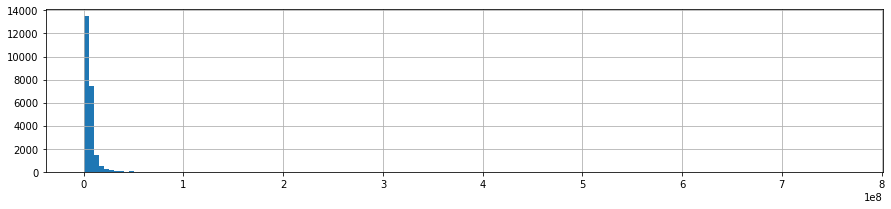

In [23]:
df['last_price'].hist(bins = 150, figsize = (15,3))

<AxesSubplot:>

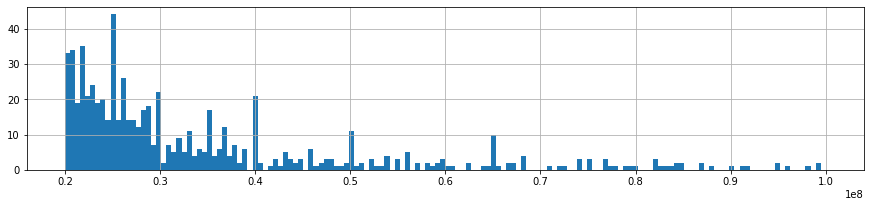

In [24]:
df['last_price'].hist(range = (20000000, 100000000), bins = 150, figsize = (15,3))

<AxesSubplot:>

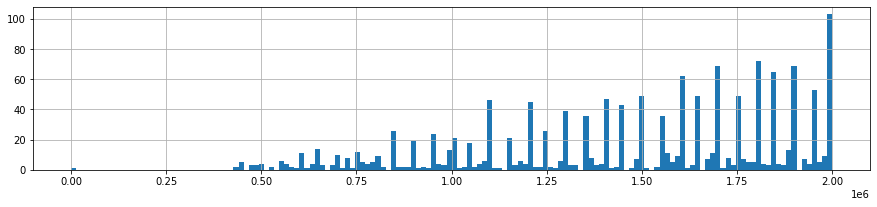

In [25]:
df['last_price'].hist(range = (0, 2000000), bins = 150, figsize = (15,3))

In [26]:
df.query('last_price > 40000000 or last_price < 750000')['last_price'].count()

270

In [27]:
df = df.query('750000 <= last_price <= 40000000')

<AxesSubplot:>

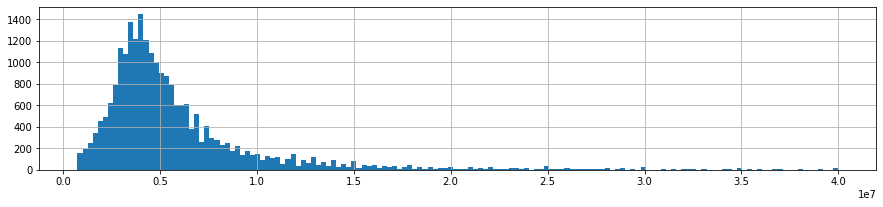

In [28]:
df['last_price'].hist(bins = 150, figsize = (15,3))

<AxesSubplot:>

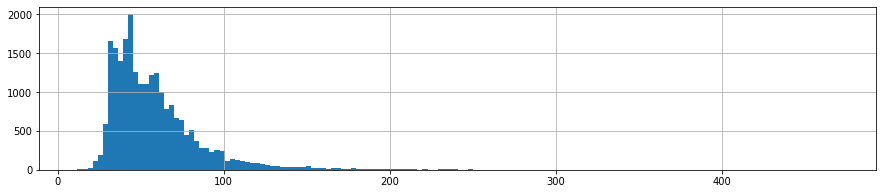

In [29]:
df['total_area'].hist(bins = 150, figsize = (15,3))

<AxesSubplot:>

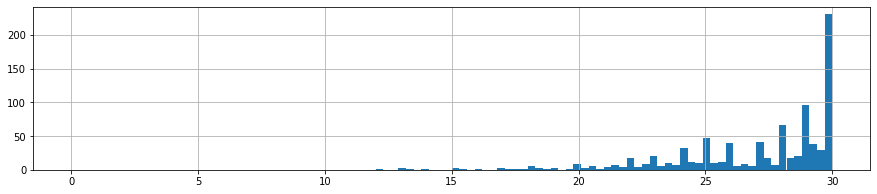

In [30]:
df['total_area'].hist(range=(0,30), bins = 100, figsize = (15,3))

<AxesSubplot:>

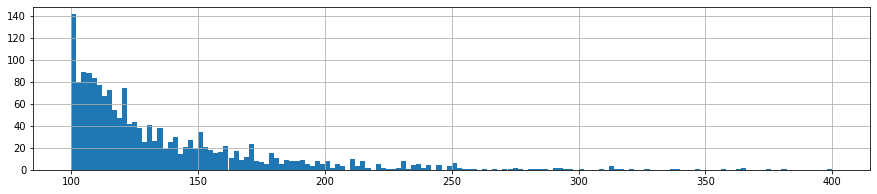

In [31]:
df['total_area'].hist(range=(100,400), bins = 150, figsize = (15,3))

In [32]:
df = df.query('20 <= total_area <= 200')

<AxesSubplot:>

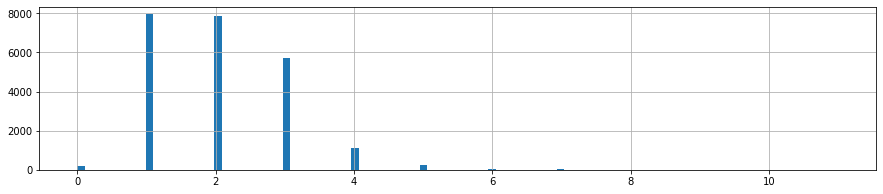

In [33]:
df['rooms'].hist(bins = 100, figsize = (15,3))

In [34]:
df['rooms'].value_counts().to_frame()

,rooms
1,7944
2,7867
3,5736
4,1113
5,256
0,185
6,60
7,20
8,2
11,2


In [35]:
df = df.query('rooms <= 7')

<AxesSubplot:>

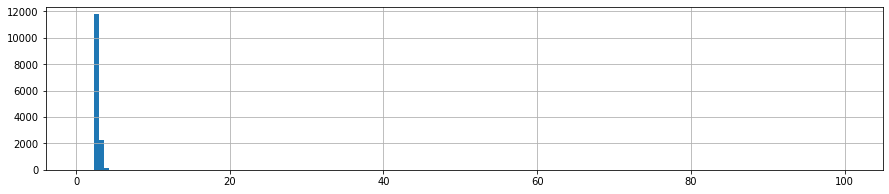

In [36]:
df['ceiling_height'].hist(bins = 150, figsize = (15,3))

<AxesSubplot:>

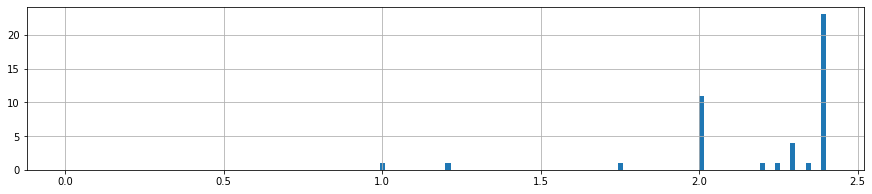

In [37]:
df['ceiling_height'].hist(range=(0, 2.4), bins = 150, figsize = (15,3))

<AxesSubplot:>

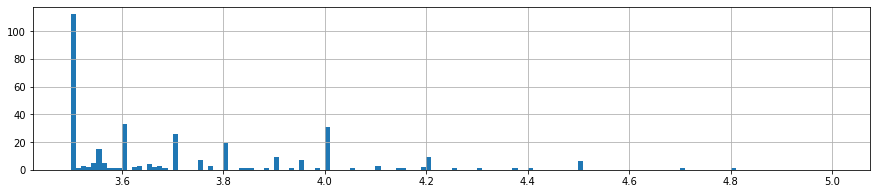

In [38]:
df['ceiling_height'].hist(range=(3.5, 5), bins = 150, figsize = (15,3))

In [39]:
df.query('ceiling_height < 2.5 or ceiling_height > 4')['ceiling_height'].count()

134

In [40]:
df = df.query('2.5 <= ceiling_height <= 4 or ceiling_height.isna()')

<AxesSubplot:>

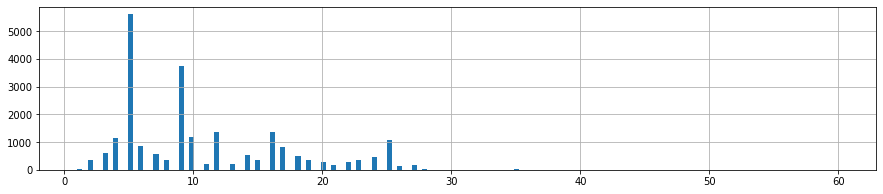

In [41]:
df['floors_total'].hist(bins = 150, figsize = (15,3))

<AxesSubplot:>

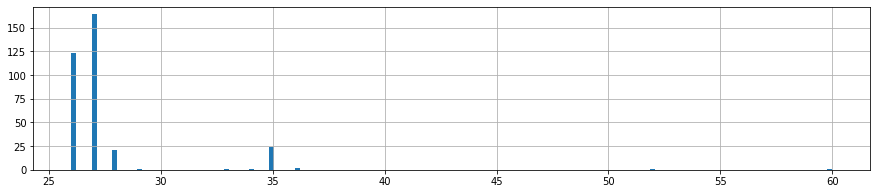

In [42]:
df['floors_total'].hist(range=(26,60), bins = 150, figsize = (15,3))

In [43]:
df = df.query('1 < floors_total <= 28 or floors_total.isna()')

<AxesSubplot:>

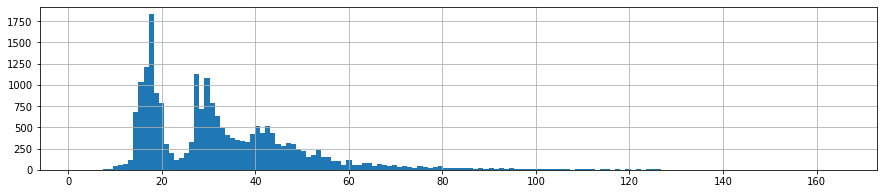

In [44]:
df['living_area'].hist(bins = 150, figsize = (15,3))

<AxesSubplot:>

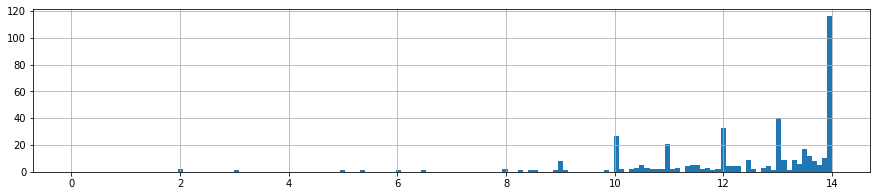

In [45]:
df['living_area'].hist(range=(0, 14), bins = 150, figsize = (15,3))

<AxesSubplot:>

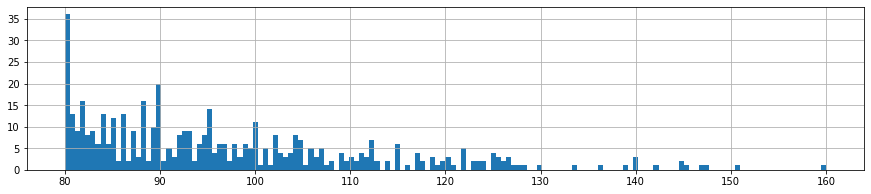

In [46]:
df['living_area'].hist(range=(80, 160), bins = 150, figsize = (15,3))

In [47]:
df = df.query('10 < living_area < 130 or living_area.isna()')

<AxesSubplot:>

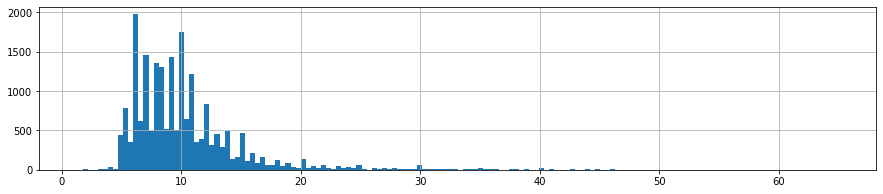

In [48]:
df['kitchen_area'].hist(bins = 150, figsize = (15,3))

<AxesSubplot:>

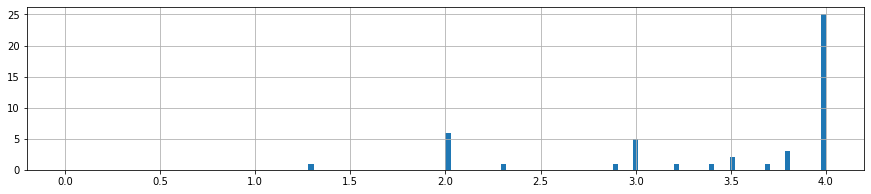

In [49]:
df['kitchen_area'].hist(range=(0, 4), bins = 150, figsize = (15,3))

<AxesSubplot:>

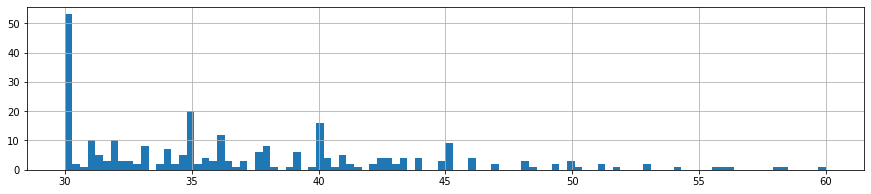

In [50]:
df['kitchen_area'].hist(range=(30, 60), bins = 100, figsize = (15,3))

In [51]:
df = df.query('4 < kitchen_area <= 45 or kitchen_area.isna()')

<AxesSubplot:>

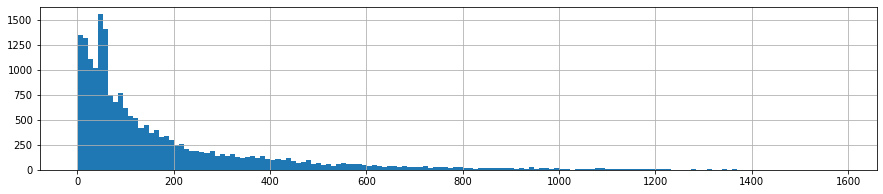

In [52]:
df['days_exposition'].hist(bins = 150, figsize = (15,3))

<AxesSubplot:>

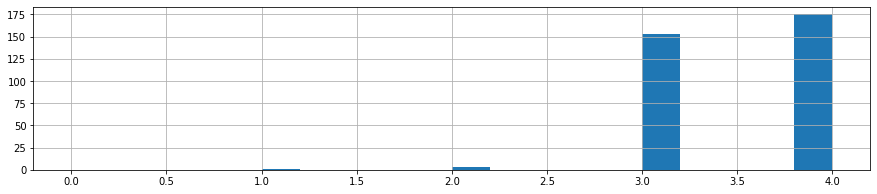

In [53]:
df['days_exposition'].hist(range=(0, 4), bins = 20, figsize = (15,3))

<AxesSubplot:>

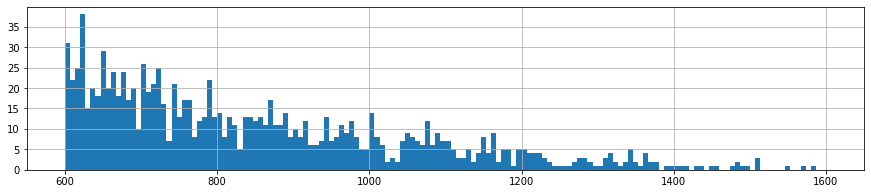

In [54]:
df['days_exposition'].hist(range=(600, 1600), bins = 150, figsize = (15,3))

In [55]:
df = df.query('3 < days_exposition <= 1300 or days_exposition.isna()')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22795 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22795 non-null  int64         
 1   last_price            22795 non-null  float64       
 2   total_area            22795 non-null  float64       
 3   first_day_exposition  22795 non-null  datetime64[ns]
 4   rooms                 22795 non-null  int64         
 5   ceiling_height        13953 non-null  float64       
 6   floors_total          22795 non-null  int64         
 7   living_area           21009 non-null  float64       
 8   floor                 22795 non-null  int64         
 9   is_apartment          22795 non-null  bool          
 10  studio                22795 non-null  bool          
 11  open_plan             22795 non-null  bool          
 12  kitchen_area          20681 non-null  float64       
 13  balcony         

In [57]:
df.reset_index(inplace=True)

#### Вывод

Пропуски в `is_apartment` заполнены значениями `False`, в `locality_name` - unknown, в `balcony`, `parks_nearest`, `ponds_nearest` нулями.

Пропуски в столбцах `ceiling_height`, `floors_total`, `living_area`, `kitchen_area`, `is_apartment`, `balcony`, `is_apartment`. `locality_name` скорее всего обусловлены отсутствием формы выбора.

Пропуски в столбце `cityCenters_nearest`, скорее всего вызваны отсутствием метки центра города. В `airports_nearest`, `parks_nearest`, `ponds_nearest`, скорее всего вызваны отсутствием этих объектов в городе. В `days_exposition` скорее всего из-за отсутствия продажи на момент запроса датасета

Пропуски в столбцах `parks_around3000`, `ponds_around3000` скорее всего вызваны багом, в ячейках наблюдается полное биективное отсутствие данных.


Тип данных в столбце `first_day_exposition` измененен на `daytime`. Тип данных в столбце `is_apartment` измененен на `bool`.
Тип данных в столбцах `balcony`, `parks_around3000`, `ponds_around3000` изменен на `int`. Для столбцов `floors_total`, `days_exposition` смены типов невозможны ввиду наличия значений nan.


Удалены неявные дубликаты в столбце `locality_name`

Отсечены хвосты распределений в столбцах `last_price`, `total_area`, `rooms`, `ceiling_height`, `floors_total`, `living_area`, `kitchen_area`, `days_exposition`

Потеря данных 4.11%

### Добавление в таблицу новых столбцов-метрик

In [63]:
def check_floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    if 1 < row['floor'] < row['floors_total']: # значения nan не обрабатываются
        return 'другой'

In [64]:
df['price_of_one_square_meter'] = df['last_price'] / df['total_area']
df['day_of_the_week'] = df['first_day_exposition'].dt.dayofweek
df['month_of_publication'] = df['first_day_exposition'].dt.month
df['year_of_publication'] = df['first_day_exposition'].dt.year
df['floor_type'] = df.apply(check_floor_type, axis=1)
df['distance_to_the_city_center_km'] =  (df['cityCenters_nearest'] / 1000).round()

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22795 entries, 0 to 22794
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   index                           22795 non-null  int64         
 1   total_images                    22795 non-null  int64         
 2   last_price                      22795 non-null  float64       
 3   total_area                      22795 non-null  float64       
 4   first_day_exposition            22795 non-null  datetime64[ns]
 5   rooms                           22795 non-null  int64         
 6   ceiling_height                  13953 non-null  float64       
 7   floors_total                    22795 non-null  int64         
 8   living_area                     21009 non-null  float64       
 9   floor                           22795 non-null  int64         
 10  is_apartment                    22795 non-null  bool          
 11  st

Добавлены новые столбцы `price_of_one_square_meter`, `day_of_the_week`, `month_of_publication`, `year_of_publication`, `floor_type`, `distance_to_the_city_center_km`, отвечающие соответственно за: цену одного квадратного метра, день недели публикации объявления, месяц публикации объявления, год публикации объявления, тип этажа квартиры, расстояние до центра города в километрах.

### Исследовательский анализ данных

#### Оценка типичной квартиры и времени активности арендодателей

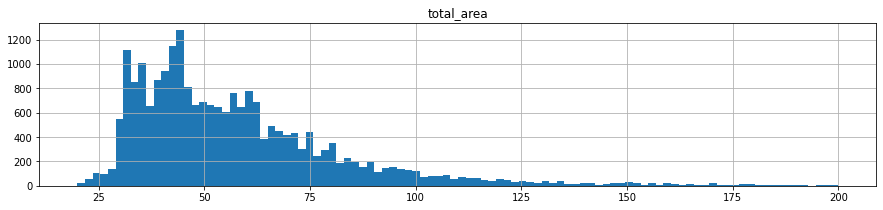

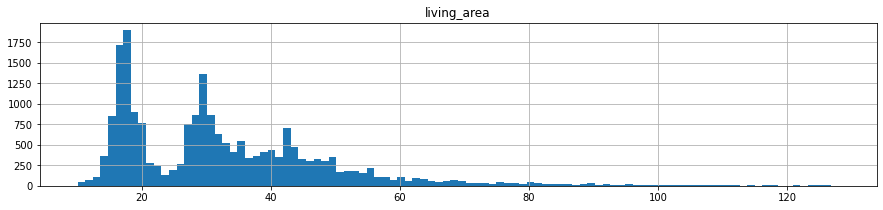

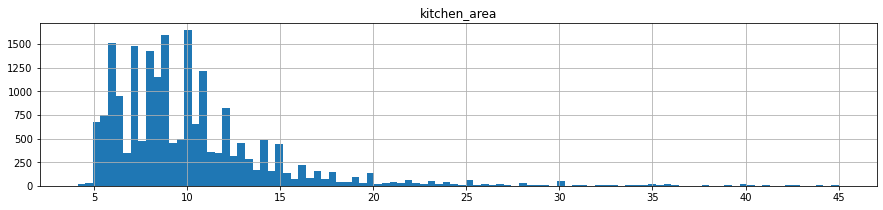

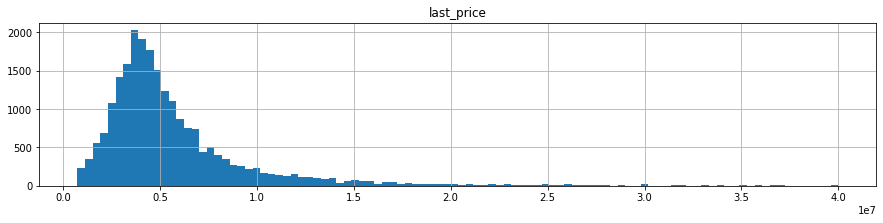

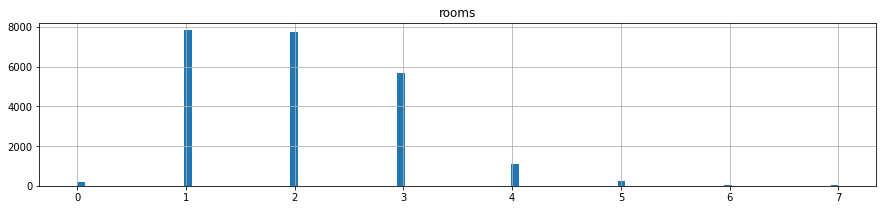

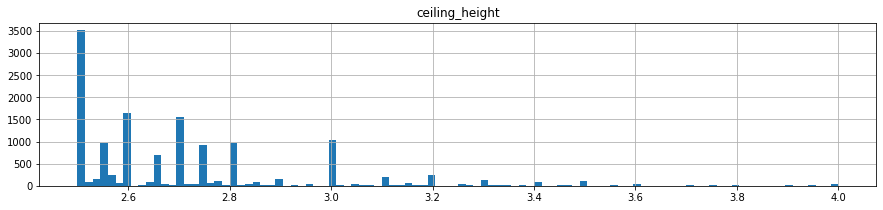

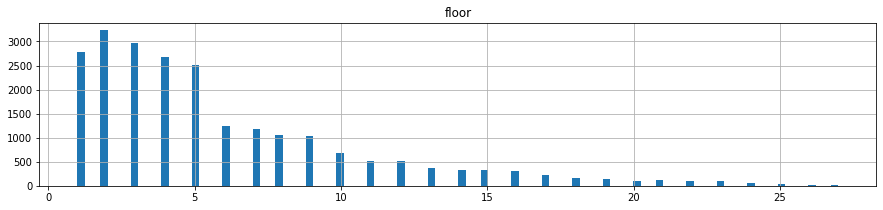

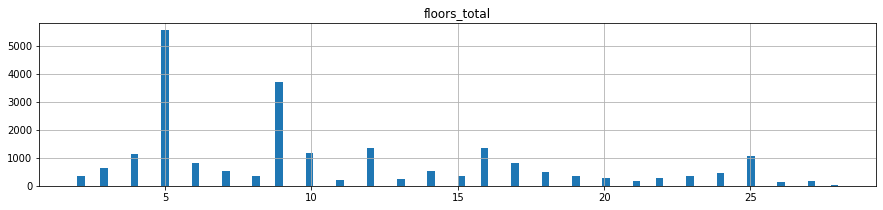

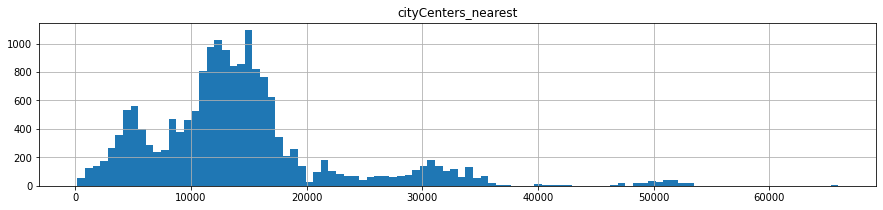

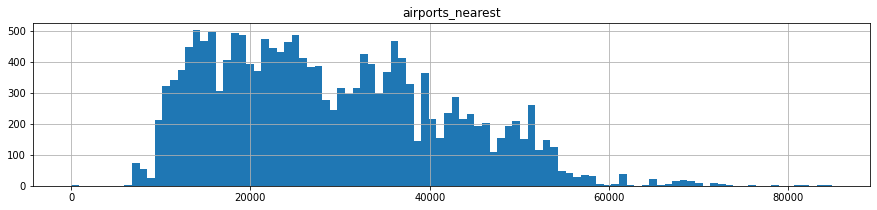

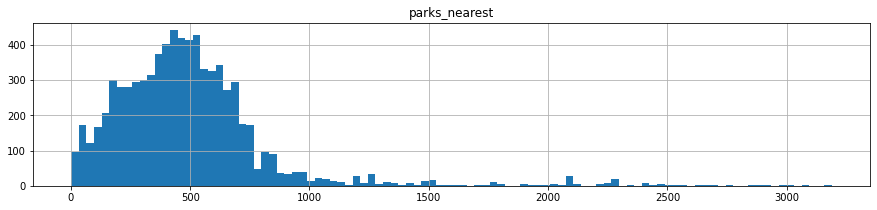

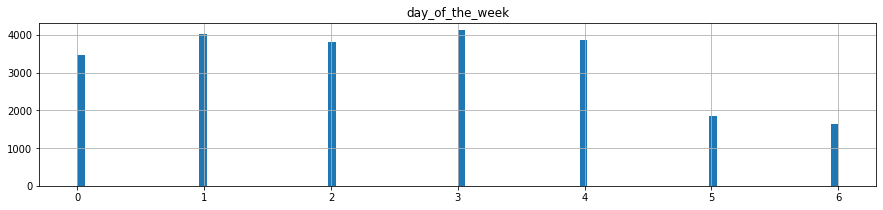

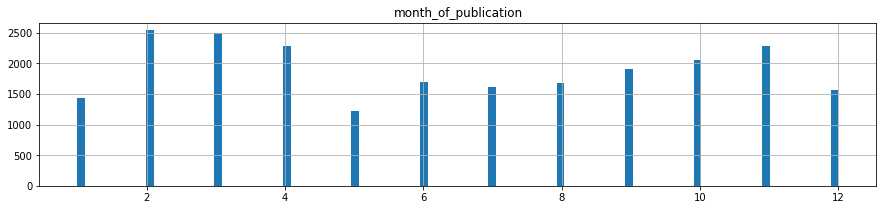

In [66]:
col_plot = ['total_area', 'living_area', 'kitchen_area',
    'last_price', 'rooms', 'ceiling_height',
    'floor', 'floors_total',
    'cityCenters_nearest', 'airports_nearest',
    'parks_nearest', 'day_of_the_week', 
    'month_of_publication'
]
for col in col_plot:
    df.hist(col, figsize=(15,3), bins=100);
    plt.show()

In [67]:
(
    df[['total_area', 'living_area', 'kitchen_area',
        'last_price', 'rooms', 'ceiling_height',
        'floor', 'floors_total',
        'cityCenters_nearest', 'airports_nearest',
        'parks_nearest']]
    .apply (['count', 'median'])   
    .style.format("{:,.2f}")
)

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height,floor,floors_total,cityCenters_nearest,airports_nearest,parks_nearest
count,"22,795.00","21,009.00","20,681.00","22,795.00","22,795.00","13,953.00","22,795.00","22,795.00","17,472.00","17,452.00","7,658.00"
median,51.90,30.00,9.00,"4,600,000.00",2.00,2.65,4.00,9.00,"13,188.50","26,890.00",456.00


Типичная квартира для продажи в Питере и области - двушка 51,9 квадрата из них 30 жилых и 9 кухня, потолки 2,65м в девятиэтажке на 4 этаже. 13 км от центра, 27км от аэропорта, 500м от ближайшего парка за 4,6 млн.

Самые активные дни выставления на продажу - будни, причем значительно, в рабочий день выставляется в 2 раза больше квартир чем в выходной, что может свидетльствовать о том, что от 3 до 5 из 6  квартир выставляется риэлторами, в зависимости от того как принять активность обычных продавцов в течение недели.

#### Анализ времени продажи

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

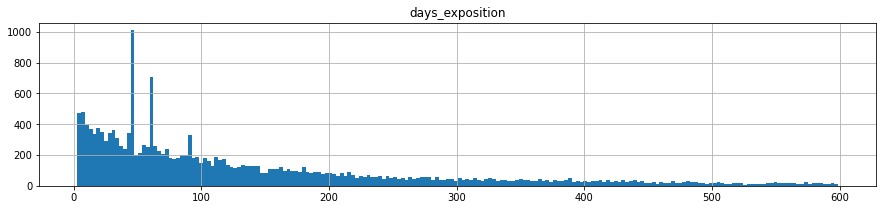

In [68]:
df.query('days_exposition < 600').hist('days_exposition', figsize=(15,3), bins=200)

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

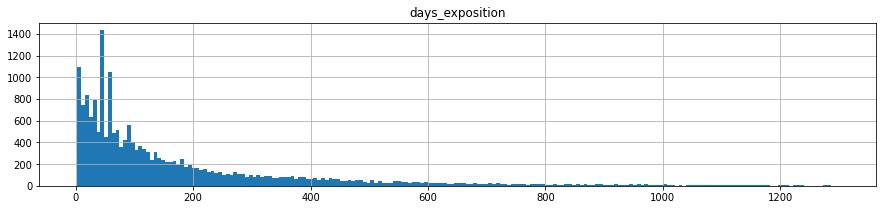

In [69]:
df.hist('days_exposition', figsize=(15,3), bins=200)

In [70]:
df['days_exposition'].mean()

176.51780655605018

In [71]:
df['days_exposition'].median()

94.0

In [72]:
df.query('days_exposition < 500')['days_exposition'].count() / df['days_exposition'].count()

0.9182011331444759

In [73]:
days_exposition_velocity = df.pivot_table(index='year_of_publication', values='days_exposition', aggfunc=['mean', 'median', 'count'])
days_exposition_velocity.columns = ['mean', 'median', 'count']
days_exposition_velocity

,mean,median,count
year_of_publication,,,
2014,827.752577,781.0,97
2015,622.371957,560.0,1027
2016,321.320675,234.0,2607
2017,157.949066,102.0,7657
2018,94.137014,64.0,7335
2019,30.949282,23.0,1045


<AxesSubplot:xlabel='year_of_publication'>

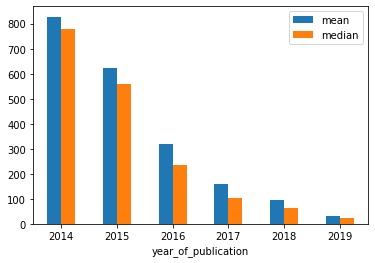

In [74]:
days_exposition_velocity.plot(kind='bar', y=['mean','median'], rot=0)

Квартиры начинают продаваться уже на 3-4 день и в среднем продаются за 176 дней, наиболее часто продажа происходит на 94 день. Более 90% квартир продаются менее чем за 500 дней, а остальные же продаются необычайно долго - до 5 лет.
Время продажи квартиры со временем уменьшалось с 800 дней в 2014 до 30 дней в 2019

#### Анализ зависимости цен от различных параметров

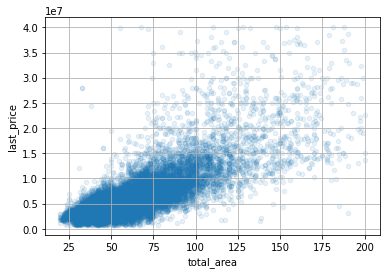

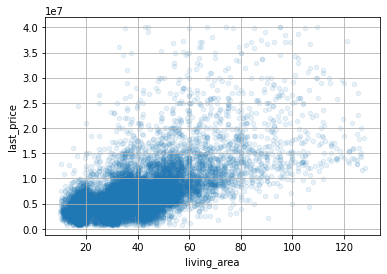

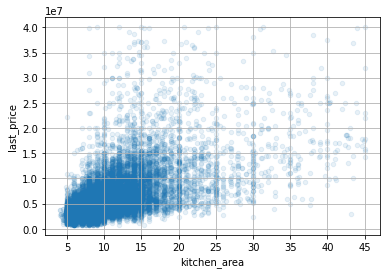

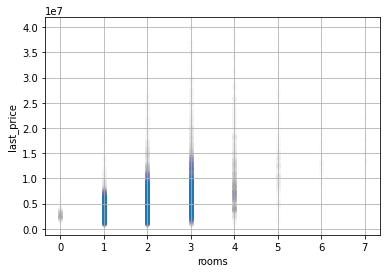

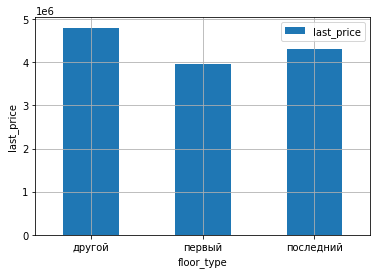

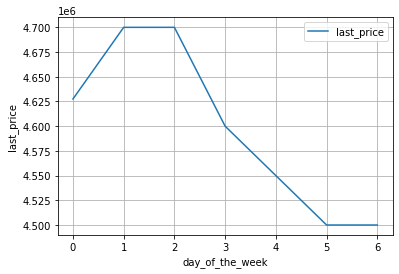

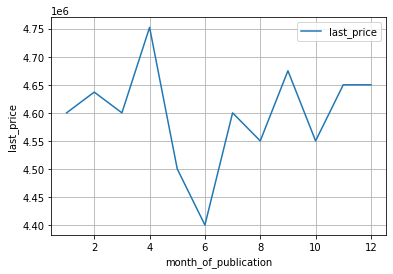

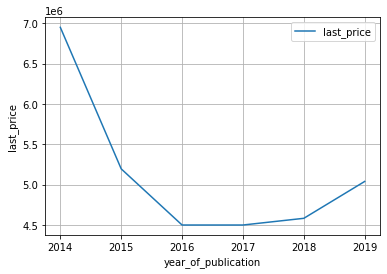

In [75]:
scatter_list = ['total_area', 'living_area', 'kitchen_area']

line_list = ['day_of_the_week', 'month_of_publication', 'year_of_publication']



for col in scatter_list:
    df.dropna(subset=[col]).plot(kind='scatter', y='last_price', x=col, alpha = 0.1, grid=True)
    plt.show()
    
df.dropna(subset=['rooms']).plot(kind='scatter', y='last_price', x='rooms', alpha = 0.005, grid=True)
plt.show()

(
    df.pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(kind='bar', xlabel='floor_type', ylabel='last_price', grid=True, rot=0)
)
plt.show()

for col in line_list:
    (
        df.pivot_table(index=col, values='last_price', aggfunc='median')
        .plot(kind='line', xlabel=col, ylabel='last_price', grid=True)
    )
    plt.show()

<AxesSubplot:xlabel='year_of_publication', ylabel='last_price'>

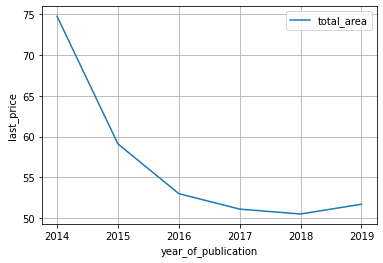

In [76]:
(
    df.pivot_table(index='year_of_publication', values='total_area', aggfunc='median')
    .plot(kind='line', xlabel=col, ylabel='last_price', grid=True)
)

In [77]:
col_for_corr_with_last_price = [
    'total_area', 'living_area', 'kitchen_area',
    'rooms', 'year_of_publication'
]

pd.DataFrame(
    index=['corr(\'last_price\')'],
    columns=col_for_corr_with_last_price,  
    data=np.array([df['last_price'].corr(df[col]) for col in col_for_corr_with_last_price]).reshape(1,-1)   
)

,total_area,living_area,kitchen_area,rooms,year_of_publication
corr('last_price'),0.772136,0.662035,0.588441,0.478055,-0.026886


Цена квартиры, как и ожидалось, прямо зависит как от жилой, так и нежилой площади. От дня недели и месяца цена практически не зависит. C 2015 по 2016 года средняя цена продажи упала с 5.2 до 4.5 млн, с 2017 по 2019 наблюдается равномерный подъем цены с 4.5 до 5 млн, график в целом повторяет тенденцию площади квартир по годам.

#### Анализ средней цены квадратного метра

In [78]:
df_city_grouped = df.pivot_table(index='locality_name', values='price_of_one_square_meter', aggfunc=['mean','count'])
df_city_grouped.columns = ['mean_price_of_one_square_meter', 'number_of_objects']
df_city_grouped.sort_values('number_of_objects', ascending=False).head(10)

,mean_price_of_one_square_meter,number_of_objects
locality_name,,
санкт-петербург,111400.312459,15066
мурино,85772.746615,575
кудрово,95258.055720,467
шушары,78516.736855,436
всеволожск,68686.660645,395
пушкин,102868.445015,353
колпино,75352.475583,336
парголово,90275.398357,323
гатчина,68757.678644,306


In [79]:
(df_city_grouped
    .sort_values('number_of_objects', ascending=False)
    .head(10)
    .sort_values('mean_price_of_one_square_meter', ascending=False)
    .style.format("{:,.0f}")
)

,mean_price_of_one_square_meter,number_of_objects
locality_name,,
санкт-петербург,"111,400","15,066"
пушкин,"102,868",353
кудрово,"95,258",467
парголово,"90,275",323
мурино,"85,773",575
шушары,"78,517",436
колпино,"75,352",336
гатчина,"68,758",306
всеволожск,"68,687",395


<AxesSubplot:xlabel='locality_name'>

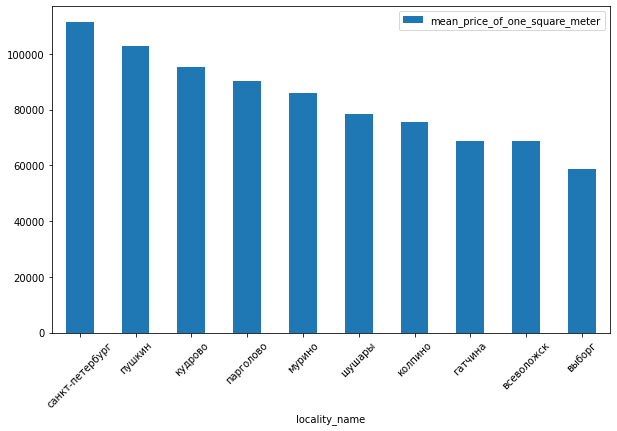

In [80]:
(df_city_grouped
    .sort_values('number_of_objects', ascending=False)
    .head(10)
    .sort_values('mean_price_of_one_square_meter', ascending=False)
).plot(y='mean_price_of_one_square_meter', kind='bar', figsize=(10,6), rot=45)

<AxesSubplot:ylabel='locality_name'>

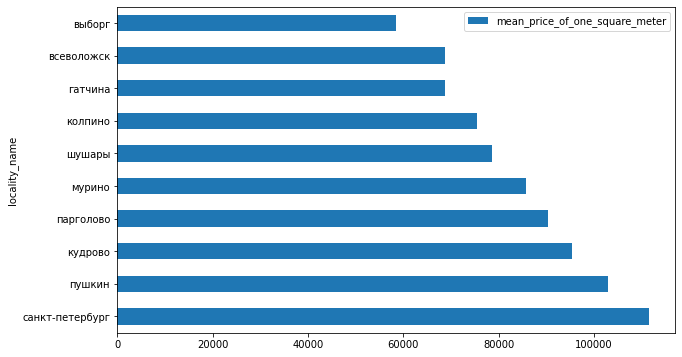

In [81]:
(df_city_grouped
    .sort_values('number_of_objects', ascending=False)
    .head(10)
    .sort_values('mean_price_of_one_square_meter', ascending=False)
).plot(y='mean_price_of_one_square_meter', kind='barh', figsize=(10,6))

Среди 10 городов с наибольшим числом выставленного на продажу жилья наибольшей ценой квадратного метра отличается Питер - 110тыс, наименьшей - выборг 60тыс. Между нимим происходит плавный спад в ряду 'санкт-петербург', 'пушкин', 'кудрово', 'парголово', 'мурино', 'шушары', 'колпино', 'гатчина', 'всеволожск', 'выборг'

#### Средняя цена километра в Питере

In [82]:
(df
    .query('locality_name == "санкт-петербург"')
    .pivot_table(index='distance_to_the_city_center_km', values='price_of_one_square_meter', aggfunc=['mean','count'])
)

,mean,count
,price_of_one_square_meter,price_of_one_square_meter
distance_to_the_city_center_km,,
0.0,145780.314635,16
1.0,144431.254522,164
2.0,134354.237568,263
3.0,117008.900661,326
4.0,127412.492175,638
5.0,134566.537171,830
6.0,137100.535696,543
7.0,137826.326238,376


<AxesSubplot:xlabel='distance_to_the_city_center_km'>

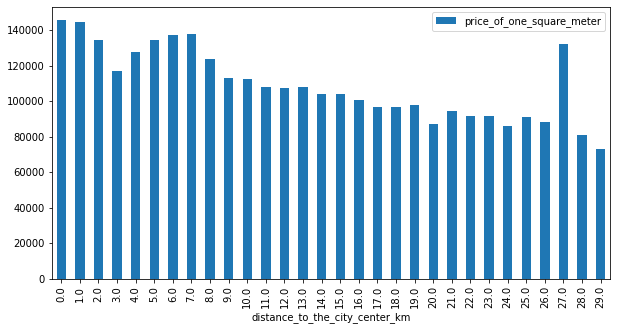

In [83]:
(df
    .query('locality_name == "санкт-петербург"')
    .pivot_table(index='distance_to_the_city_center_km', values='price_of_one_square_meter', aggfunc='mean')
    .plot(kind='bar', figsize=(10,5))
)

<AxesSubplot:>

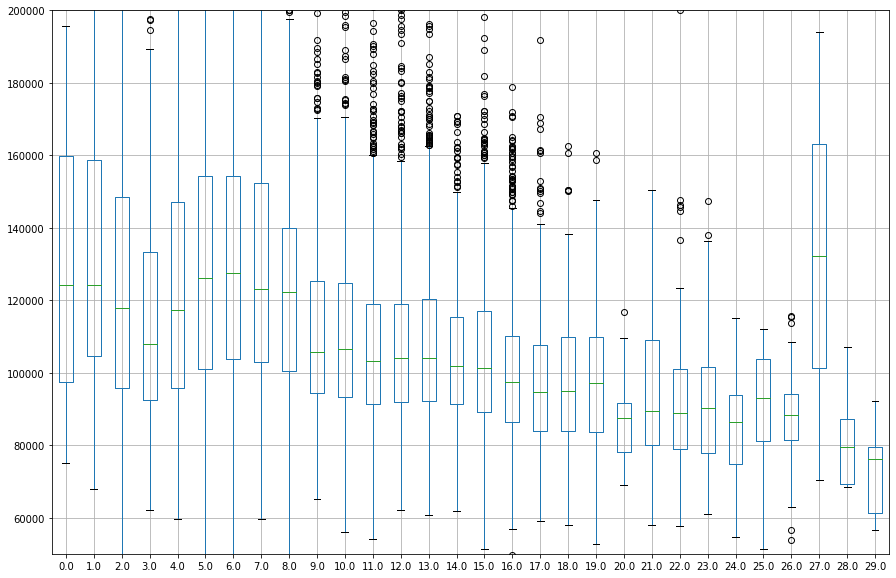

In [84]:
(df
    .query('locality_name == "санкт-петербург"')
    .pivot_table(index='index', columns='distance_to_the_city_center_km', values='price_of_one_square_meter')
    .plot(kind='box', figsize=(15,10), ylim=(50000,200000), grid=True)
)

Цена каждого километра в городе падает. Около центра цена за квадрат около 125тыс, на окраине - 85тыс.

#### Вывод

Типичная квартира для продажи в Питере и области - двушка 51,9 квадрата из них 30 жилых и 9 кухня, потолки 2,65м в девятиэтажке на 4 этаже. 13 км от центра, 27км от аэропорта, 500м от ближайшего парка за 4,6 млн.

Самые активные дни выставления на продажу - будни. От 3 до 5 из 6 квартир выставляется риэлторами.

Квартиры начинают продаваться уже на 3-4 день и в среднем продаются за 176 дней, наиболее часто продажа происходит на 94 день. Более 90% квартир продаются менее чем за 500 дней, а остальные же продаются необычайно долго - до 5 лет. Время продажи квартиры со временем уменьшалось с 800 дней в 2014 до 30 дней в 2019

Цена квартиры больше всего зависит от площади. От дня недели и месяца цена практически не зависит. C 2015 по 2016 года средняя цена продажи упала с 5.2 до 4.5 млн, с 2017 по 2019 наблюдается равномерный подъем цены с 4.5 до 5 млн, вслед за площадью квартир по годам.

Среди 10 городов с наибольшим числом выставленного на продажу жилья наибольшей ценой квадратного метра отличается Питер - 110тыс, наименьшей - выборг 60тыс. Между нимим происходит плавный спад в ряду 'санкт-петербург', 'пушкин', 'кудрово', 'парголово', 'мурино', 'шушары', 'колпино', 'гатчина', 'всеволожск', 'выборг'

Цена каждого километра в городе падает. В Питере около центра цена за квадрат около 125тыс, на окраине - 85тыс.

### Общий вывод

#### Техническая часть 1

Пропуски в столбцах `ceiling_height`, `floors_total`, `living_area`, `kitchen_area`, `is_apartment`, `balcony`, скорее всего, вызваны тем, что в форме можно не вбивать эти ячейки. Многие пренебрегают заполнением значения `is_apartment`. Также, некоторые смогли вбить в форму жилье без города (столбец `locality_name`). Во всех этих случаях стоит ввести обязательное заполнение поля или выбор среди нескольких результатов, что в случае столбца `locality_name` также поможет убрать дубликаты.

Пропуски в столбце `cityCenters_nearest`, скорее всего вызваны отсутствием метки центра города. В `airports_nearest`, `parks_nearest`, `ponds_nearest`, вызваны банальным отсутствием этих объектов в городе, стоит проверить это отдельно.

Пропуски в столбцах `parks_around3000`, `ponds_around3000` скорее всего вызваны багом, в ячейках наблюдается полное биективное отсутствие данных.

#### Техническая  часть 2

Добавлены новые столбцы `price_of_one_square_meter`, `day_of_the_week`, `month_of_publication`, `year_of_publication`, `floor_type`, `distance_to_the_city_center_km`, отвечающие соответственно за: цену одного квадратного метра, день недели публикации объявления, месяц публикации объявления, год публикации объявления, тип этажа квартиры, расстояние до центра города в километрах.

#### Бизнес часть

Типичная квартира в Питере и области - двушка в девятиэтажке на 52 квадрата, из них 30 жилых, в 13 км от центра за 4,6 млн.

Самые активные дни выставления на продажу - будни. От 3 до 5 из 6 квартир выставляется риэлторами.

Квартиры начинают продаваться уже на 3-4 день и в среднем продаются за 176 дней, наиболее часто продажа происходит на 94 день. Более 90% квартир продаются менее чем за 500 дней, а остальные же продаются необычайно долго - до 5 лет. Время продажи квартиры со временем уменьшалась с 800 дней в 2014 до 30 дней в 2019

Цена квартиры больше всего зависит от площади. От дня недели и месяца цена практически не зависит. C 2015 по 2016 года средняя цена продажи упала с 5.2 до 4.5 млн, с 2017 по 2019 наблюдается равномерный подъем цены с 4.5 до 5 млн, вслед за площадью квартир по годам.

Среди 10 городов с наибольшим числом выставленного на продажу жилья наибольшей ценой квадратного метра отличается Питер - 110тыс, наименьшей - выборг 60тыс. Между нимим происходит плавный спад в ряду 'санкт-петербург', 'пушкин', 'кудрово', 'парголово', 'мурино', 'шушары', 'колпино', 'гатчина', 'всеволожск', 'выборг'

Цена каждого километра в городе падает. В Питере около центра цена за квадрат около 125тыс, на окраине - 85тыс.